In [654]:
import cv2
import copy
import numpy as np
import matplotlib.pyplot as plt

###Helper functions

In [655]:
def find_intersection(line1, line2):
  """
  This function finds the intersection point of two lines represented by (rho, theta) format.

  Args:
      line1: A list containing (rho, theta) for the first line.
      line2: A list containing (rho, theta) for the second line.

  Returns:
      A tuple containing the x and y coordinates of the intersection point,
      or None if the lines are parallel.
  """
  rho1, theta1 = line1[0]
  rho2, theta2 = line2[0]

  # Check for parallel lines (avoid division by zero)
  if np.abs(np.sin(theta1 - theta2)) < 1e-6:
    return None

  a1, b1 = np.cos(theta1), np.sin(theta1)
  a2, b2 = np.cos(theta2), np.sin(theta2)

  # Calculate the intersection point coordinates
  x = int((rho2 * b1 - rho1 * b2) / (a2 * b1 - a1 * b2))
  y = int((rho1 * a2 - rho2 * a1) / (a2 * b1 - a1 * b2))

  return (x, y)

In [656]:
def visualize_intersections(image, lines):
  """
  This function iterates through pairs of lines, finds their intersection,
  and draws a red circle at the intersection point on the image.

  Args:
      image: The image where lines were detected.
      lines: A list of lines, where each line is a list containing (rho, theta).
  """
  image_copy = copy.copy(image)
  intersections=[]
  for i in range(len(lines)):
    for j in range(i + 1, len(lines)):
      intersection = find_intersection(lines[i], lines[j])
      if intersection:

        x, y = intersection
        intersections.append([x,y])
        cv2.circle(image_copy, (x, y), 1, (0, 0, 255), -1)

  plt.imshow(image_copy, cmap="gray")
  plt.title('hough points of intersection')
  plt.show()
  return intersections

In [657]:
def draw_lines(image,lines):
  image_copy = copy.copy(image)
  if lines is not None and lines.any():
    for line in lines:
        rho,theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        # x1 stores the rounded off value of (r * cos(theta) - 1000 * sin(theta))
        x1 = int(x0 + 1000 * (-b))
        # y1 stores the rounded off value of (r * sin(theta)+ 1000 * cos(theta))
        y1 = int(y0 + 1000 * (a))
        # x2 stores the rounded off value of (r * cos(theta)+ 1000 * sin(theta))
        x2 = int(x0 - 1000 * (-b))
        # y2 stores the rounded off value of (r * sin(theta)- 1000 * cos(theta))
        y2 = int(y0 - 1000 * (a))
        # print(line)
        cv2.line(image_copy, (x1, y1), (x2, y2), (0, 0, 0), 1)
  plt.imshow(image_copy, cmap="gray")
  plt.title('Image with hough lines')
  plt.show()

In [658]:
def connect_all_points(image, points):
  """
  This function connects each point with every other point in a list of lists
  containing XY coordinates.

  Args:
      image: The image where lines will be drawn.
      points: A list of lists, where each inner list represents a point (x, y).
  """
  image_copy = copy.copy(image)
  color = (0, 0, 0)  # Red color for lines
  for i in range(len(points)):
    for j in range(i + 1, len(points)):  # Start from j = i + 1 to avoid duplicates
      start_point = (points[i][0], points[i][1])
      end_point = (points[j][0], points[j][1])
      cv2.line(image_copy, start_point, end_point, color, 1)  # Draw line with thickness 2
  plt.imshow(image_copy, cmap="gray")
  plt.show()
  return image_copy


In [659]:
def show_largest_contour(image , contours):
  """
  This function displays the image with the largest area contour highlighted.

  Args:
      image: to draw contour on
      contours : detected contours to choose the largest from
  """

  image_copy = copy.copy(image)
  max_area = 0
  largest_contour_index = None
  for i, cnt in enumerate(contours):
    area = cv2.contourArea(cnt)
    if area > max_area:
      max_area = area
      largest_contour_index = i

  # Draw the largest contour (if any)
  if largest_contour_index is not None:
    # Draw the contour in green with a thickness of 2
    cv2.drawContours(image_copy, [contours[largest_contour_index]], -1, (0, 255, 0), 2)  # Green color
  plt.imshow(image_copy, cmap="gray")
  plt.title('Largest contour Area')
  plt.show()

  return contours[largest_contour_index]


In [660]:
def rotate_image(Image, angle):
  """
  Rotates an image by the specified angle.

  Args:
      image_path: Path to the image file.
      angle: Rotation angle in degrees (positive for clockwise rotation).

  Returns:
      The rotated image as a NumPy array.
  """

  # Load the image

  # Get image dimensions (assuming no alpha channel)
  rows, cols = Image.shape[:2]

  # Define the rotation matrix for a clockwise rotation of 90 degrees
  rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1.0)  # Center of rotation, angle, scale

  # Rotate the image using the rotation matrix
  rotated_image = cv2.warpAffine(Image, rotation_matrix, (cols, rows))

  return rotated_image

###Frame Detection

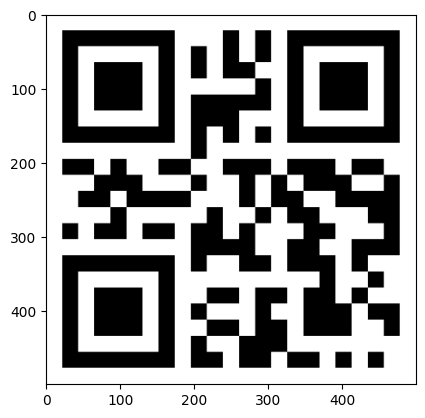

In [661]:
img = cv2.imread("1.png")
img =cv2.resize(img,dsize=(500,500))
gray1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray1, cmap="gray")
plt.show()

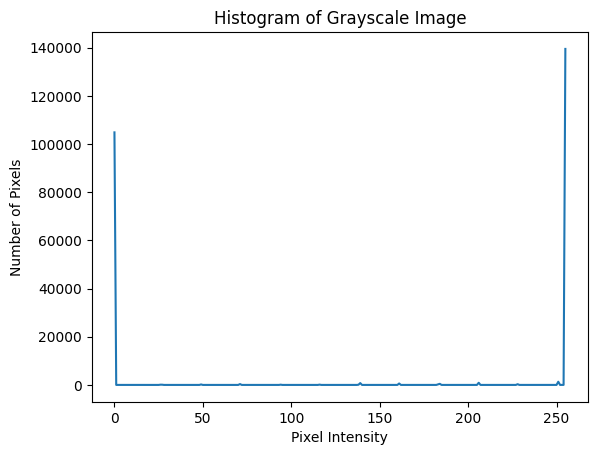

In [662]:
hist = cv2.calcHist([gray1], [0], None, [256], [0, 256])

plt.figure()
plt.plot(hist)
plt.xlabel("Pixel Intensity")
plt.ylabel("Number of Pixels")
plt.title("Histogram of Grayscale Image")
plt.show()


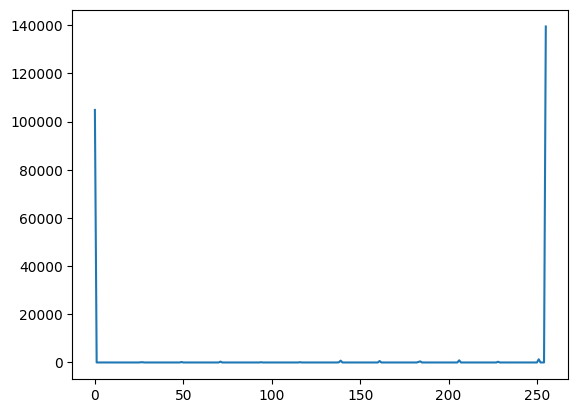

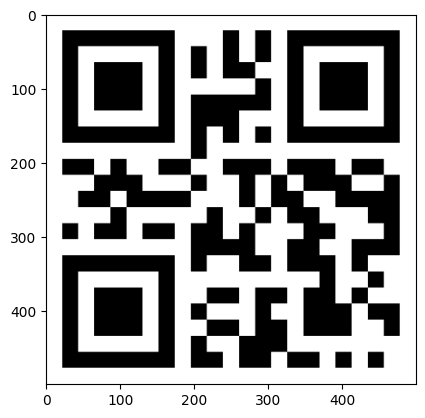

In [663]:
min_val, max_val, _, _ = cv2.minMaxLoc(gray1)
gray = cv2.convertScaleAbs(gray1, alpha=255 / (max_val - min_val), beta=-min_val * 255 / (max_val - min_val))
hist2 = cv2.calcHist([gray], [0], None, [256], [0, 256])
plt.plot(hist2)
plt.show()
plt.imshow(gray,cmap="gray")
plt.show()

# print(gray1 -gray)


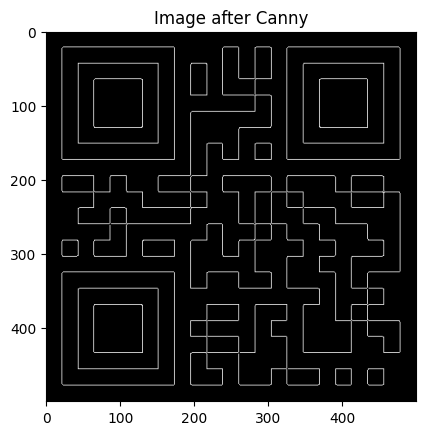

In [664]:
edges = cv2.Canny(gray, 200, 200)
plt.imshow(edges,cmap="gray")
plt.title('Image after Canny')
plt.show()

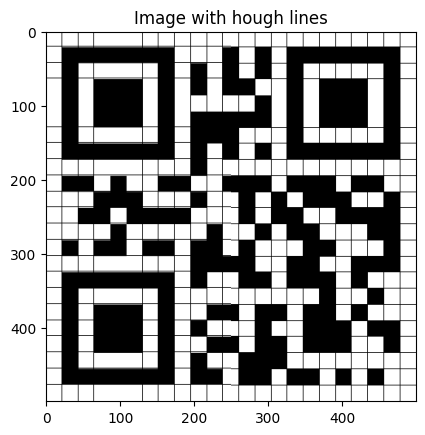

In [665]:
lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)
img2=copy.copy(img)
draw_lines(img2,lines)

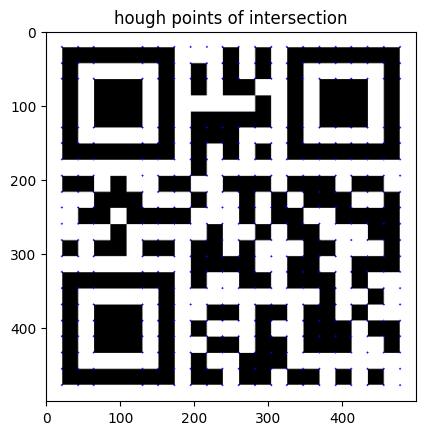

In [666]:
img3 = copy.copy(img)
intersections = visualize_intersections(img3,lines)

In [667]:
print(intersections)

[[21, 173], [325, 173], [173, 173], [195, 173], [478, 173], [282, 173], [43, 173], [260, 173], [304, 173], [151, 173], [456, 173], [347, 173], [217, 173], [64, 173], [434, 173], [130, 173], [238, 173], [412, 173], [369, 173], [391, 173], [21, 21], [325, 21], [173, 21], [195, 21], [478, 21], [282, 21], [43, 21], [260, 21], [304, 21], [151, 21], [456, 21], [347, 21], [217, 21], [64, 21], [434, 21], [130, 21], [238, 21], [412, 21], [369, 21], [391, 21], [21, 217], [21, 478], [21, 195], [21, 260], [21, 325], [21, 151], [21, 347], [21, 43], [21, 456], [21, 434], [21, 238], [21, 369], [21, 304], [21, 282], [21, 130], [21, 64], [21, 391], [21, 412], [325, 217], [325, 478], [325, 195], [325, 260], [325, 325], [325, 151], [325, 347], [325, 43], [325, 456], [325, 434], [325, 238], [325, 369], [325, 304], [325, 282], [325, 130], [325, 64], [325, 391], [325, 412], [173, 217], [173, 478], [173, 195], [173, 260], [173, 325], [173, 151], [173, 347], [173, 43], [173, 456], [173, 434], [173, 238], [173

In [668]:
img4 =copy.copy(img)

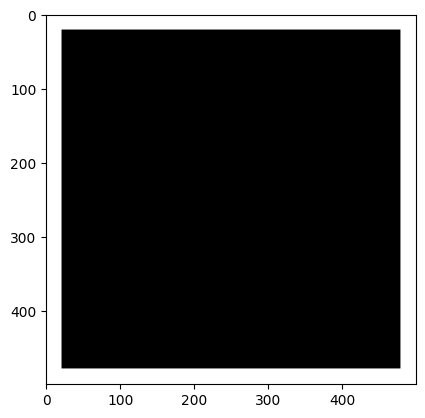

In [669]:
framed_image = connect_all_points(img4,intersections)

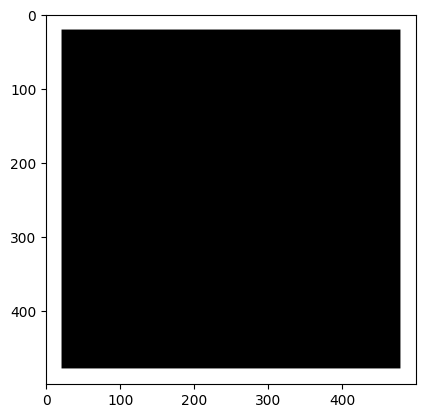

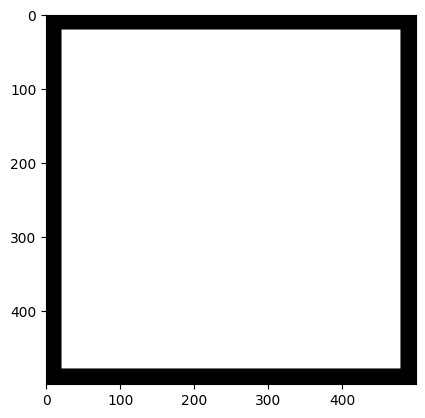

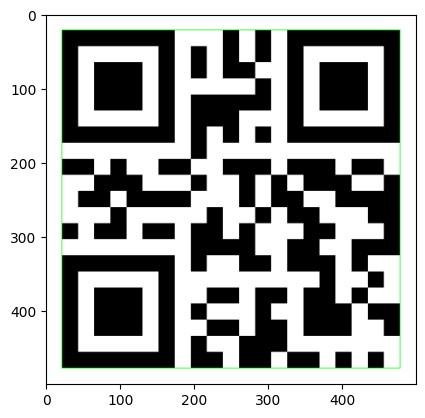

In [670]:
gray_img = cv2.cvtColor(framed_image, cv2.COLOR_BGR2GRAY)
# inv = 255 -gray_img
limit = np.min(gray_img)

# Invert the thresholding using bitwise NOT operation
ret, thresh = cv2.threshold(gray_img,limit,255,cv2.THRESH_BINARY)

inv = 255 - thresh

plt.imshow(thresh,cmap="gray")
plt.show()

plt.imshow(inv,cmap="gray")
plt.show()

img_copy = copy.copy(img)
contours, hierarchy = cv2.findContours(inv, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cont = cv2.drawContours(img_copy, contours, -1, (0, 255, 0), 1)  # Green color

plt.imshow(cont,cmap="gray")
plt.show()

# print(contours)


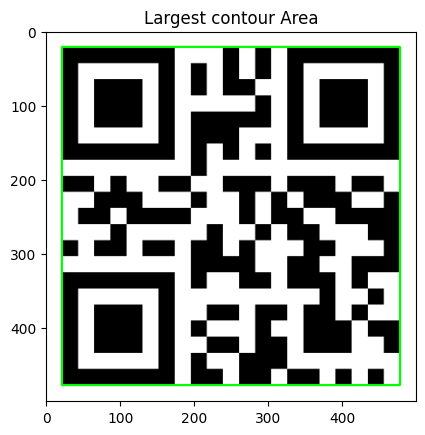

In [671]:
largest_cont = show_largest_contour(img, contours)

In [672]:
# Approximate the contour with a polygon (adjust epsilon as needed)
epsilon = 0.01 * cv2.arcLength(largest_cont, True)
approx = cv2.approxPolyDP(largest_cont, epsilon, True)

# Ensure we have a quadrilateral (4 corners)
if len(approx) != 4:
  print("Error: Not a quadrilateral")
  # Handle the case where the contour is not a quadrilateral (optional)
  exit()

# Convert the approximated polygon to NumPy array for easier manipulation
approx = np.array(approx, dtype=np.float32)

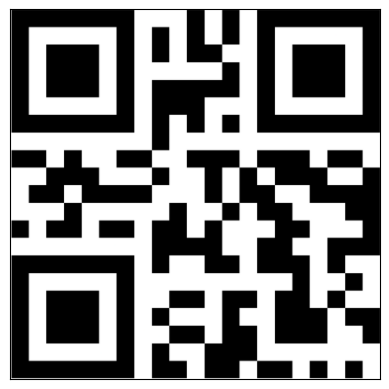

In [673]:
img_copy = copy.copy(img)
desired_quad = np.float32([[0, 0], [img.shape[1] - 1, 0], [img.shape[1] - 1, img.shape[0] - 1], [0, img.shape[0] - 1]])
# Calculate the perspective transform matrix
M = cv2.getPerspectiveTransform(approx, desired_quad)
warped_image = cv2.warpPerspective(img_copy, M, (img.shape[1], img.shape[0]))  # Adjust output size if needed

# for some reason the warped image brought mirrored and rotated

mirrored_image = cv2.flip(warped_image, 0) # mirror horizontally
rotated = rotate_image(mirrored_image,270)

plt.xticks([], [])
plt.yticks([], [])

rotated[:,0:1]=255
cv2.imwrite("warped.png", rotated)
plt.imshow(rotated,cmap="gray")

plt.show()

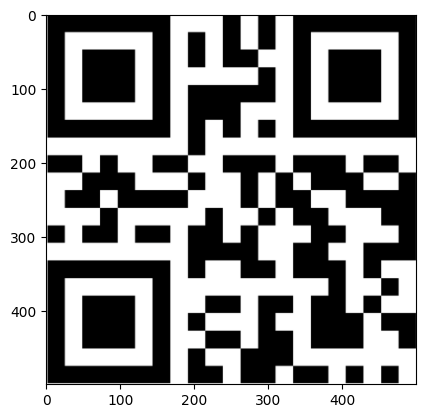

In [652]:

plt.imshow(rotated,cmap="gray")
plt.show()

###Some check on the code Frame detection Validity

In [ ]:
plt.imshow(img,cmap="gray")
plt.show()

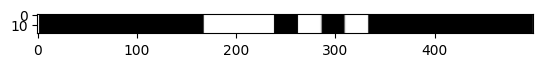

In [699]:

plt.imshow(rotated[1:20,:],cmap="gray")
plt.show()

In [707]:
Darkest = np.min(gray)
_, thresh = cv2.threshold(rotated,45,255,cv2.THRESH_BINARY)

In [709]:
for ele in thresh[1:2,:]:
  for l in ele:
    print(l)

[255 255 255]
[255 255 255]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0

In [711]:
count_balck = 0
for ele in thresh[1:2,:]:

  for l in ele:
    if 0 not in l:
      print(count_balck)
      count_balck=0
      continue
    if 0 in l:
      count_balck+=1
print(count_balck)


0
0
166
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
24
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
23
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
166


In [653]:
# Thresholding with darkest pixel
# Darkest = np.min(gray)
# ret, thresh = cv2.threshold(gray,Darkest,255,cv2.THRESH_BINARY)
# plt.imshow(thresh,cmap="gray")
# plt.show()